# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
def preproc_x(x):
    x = x.astype("float32")
    x = x.reshape(x.shape[0],-1)
    x = scaler.fit_transform(x)
    return x

def preproc_y(y):
    y = keras.utils.to_categorical(y, num_classes=10)
    return y  

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立你的神經網路
"""
from keras.models import Sequential
from keras.layers import Dense

def build_mlp(input_dim, layer_output_units, output_units):
    model = Sequential()
    for i, untis in enumerate(layer_output_units):  
        if i == 0:
            model.add(Dense(units=untis, 
                input_dim=input_dim,
                kernel_initializer='normal', 
                activation='relu'))
        else:
            model.add(Dense(units=untis,
                    kernel_initializer='normal', 
                    activation='relu'))
    model.add(Dense(units=output_units,
                kernel_initializer='normal', 
                activation='softmax'))
    return model    

In [6]:
"""
訓練模型
"""
def complie_train_model(model, optimizer,epochs, batch_size, x_train, y_train, x_test, y_test):
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    return model

In [9]:
"""
以視覺畫方式檢視訓練過程
"""
import pandas as pd
import seaborn as sns

def show_train_history(results):
    for i, result in enumerate(results):
        history = result["model"].history.history
        lr = str(result["lr"])
        df1 = pd.DataFrame({"acc"+lr:history["acc"], "val_acc"+lr:history["val_acc"]})
        df2 = pd.DataFrame({"loss"+lr:history["loss"], "val_loss"+lr:history["val_loss"]})
        if i ==0:
            df1_results = df1.copy()
            df2_results = df2.copy()
        else:
            df1_results= pd.concat([df1_results, df1], axis=1)
            df2_results= pd.concat([df2_results, df2], axis=1)    

    styles = ['bs-','ro-','y^-']    
    g1 = df1_results.plot.line()
    g1.set_xlabel("Epoch")
    g1.set_ylabel("Acc") 
    
    g2 = df2_results.plot.line()
    g2.set_xlabel("Epoch")
    g2.set_ylabel("Loss") 
    return df1_results, df2_results

In [10]:
## 超參數設定
"""
設定超參數
"""
## 超參數設定
LEARNING_RATE = [0.1, 0.001, 0.0001]
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
results = list()
"""
建立你的訓練與實驗迴圈並蒐集資料
SGD optimizer
"""
for lr in LEARNING_RATE:
    model = build_mlp(input_dim=x_train.shape[1], layer_output_units=[256,128], output_units=10)
    optimizer =  keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model = complie_train_model(model, optimizer,EPOCHS, BATCH_SIZE, x_train, y_train, x_test, y_test)
    results.append({"lr":lr, "model":model})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 309us/step - loss: 1.8677 - acc: 0.3381 - val_loss: 2.0963 - val_acc: 0.3009
Epoch 2/10
50000/50000 [==============================] - 17s 333us/step - loss: 1.9168 - acc: 0.3136 - val_loss: 1.9820 - val_acc: 0.2659
Epoch 3/10
50000/50000 [==============================] - 13s 259us/step - loss: 1.9122 - acc: 0.3034 - val_loss: 1.9126 - val_acc: 0.2753
Epoch 4/10
50000/50000 [==============================] - 18s 357us/step - loss: 1.8960 - acc: 0.3086 - val_loss: 1.9434 - val_acc: 0.2894
Epoch 5/10
50000/50000 [==============================] - 14s 276us/step - loss: 1.8936 - acc: 0.3097 - val_loss: 1.9393 - val_acc: 0.2848
Epoch 6/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.8960 - acc: 0.3051 - val_loss: 2.1626 - val_acc: 0.2

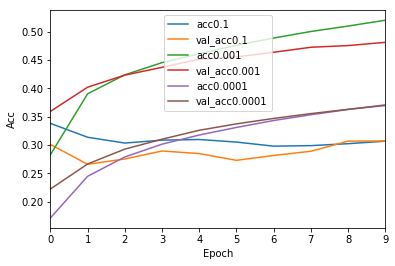

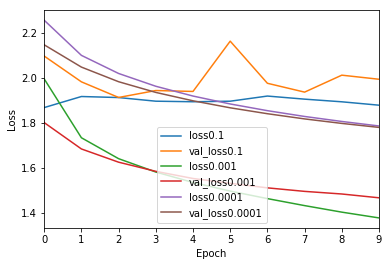

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
"""Code Here
將結果繪出
"""     
df1_results, df2_results = show_train_history(results)

In [16]:
df1_results

,acc0.1,val_acc0.1,acc0.001,val_acc0.001,acc0.0001,val_acc0.0001
0,0.33812,0.3009,0.28298,0.3594,0.17118,0.2223
1,0.31364,0.2659,0.39048,0.4021,0.24476,0.2665
2,0.30340,0.2753,0.42392,0.4234,0.27890,0.2927
3,0.30858,0.2894,0.44548,0.4372,0.30144,0.3102
4,0.30968,0.2848,0.46114,0.4515,0.31762,0.3260
5,0.30514,0.2729,0.47612,0.4555,0.33098,0.3373
6,0.29792,0.2815,0.48890,0.4638,0.34322,0.3469
7,0.29888,0.2889,0.50046,0.4726,0.35340,0.3554
8,0.30230,0.3068,0.51006,0.4756,0.36274,0.3630
9,0.30674,0.3071,0.52034,0.4813,0.37088,0.3698


In [17]:
df2_results

,loss0.1,val_loss0.1,loss0.001,val_loss0.001,loss0.0001,val_loss0.0001
0,1.867686,2.096338,1.994980,1.800971,2.255402,2.146273
1,1.916822,1.981968,1.733758,1.684044,2.099482,2.047425
2,1.912249,1.912584,1.640863,1.625277,2.019106,1.982497
3,1.896029,1.943390,1.581604,1.584639,1.962330,1.935011
4,1.893590,1.939310,1.535222,1.552925,1.918893,1.897792
5,1.896000,2.162554,1.496980,1.531373,1.883753,1.866682
6,1.918853,1.975587,1.463607,1.511332,1.853984,1.840464
7,1.905126,1.936310,1.432525,1.495710,1.828252,1.817383
8,1.893350,2.011579,1.403500,1.484075,1.806043,1.797408
9,1.878301,1.993430,1.377877,1.467175,1.786028,1.779687


In [18]:
results = list()
"""
建立你的訓練與實驗迴圈並蒐集資料
Adam optimizer
"""
for lr in LEARNING_RATE:
    model = build_mlp(input_dim=x_train.shape[1], layer_output_units=[256,128], output_units=10)
    optimizer =  keras.optimizers.Adam(lr=lr)
    model = complie_train_model(model, optimizer,EPOCHS, BATCH_SIZE, x_train, y_train, x_test, y_test)
    results.append({"lr":lr, "model":model})

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 27s 544us/step - loss: 14.4443 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 35s 703us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 34s 676us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 43s 865us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 22s 447us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 15s 299us/step - loss: 0.9703 - acc: 0.6563 - val_loss: 1.4126 - val_acc: 0.5317
Epoch 9/10
50000/50000 [==============================] - 13s 253us/step - loss: 0.9140 - acc: 0.6791 - va

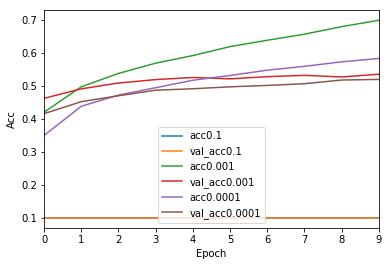

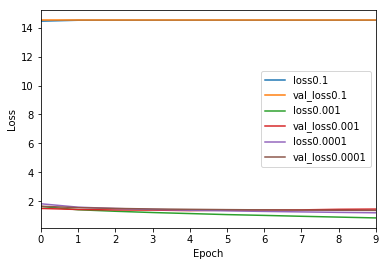

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
"""Code Here
將結果繪出
"""     
df1_results, df2_results = show_train_history(results)

In [20]:
df1_results

,acc0.1,val_acc0.1,acc0.001,val_acc0.001,acc0.0001,val_acc0.0001
0,0.1,0.1,0.42016,0.4622,0.34968,0.4158
1,0.1,0.1,0.49706,0.4909,0.43810,0.4519
2,0.1,0.1,0.53752,0.5084,0.47190,0.4699
3,0.1,0.1,0.56856,0.5188,0.49422,0.4867
4,0.1,0.1,0.59160,0.5252,0.51684,0.4911
5,0.1,0.1,0.61868,0.5211,0.53118,0.4969
6,0.1,0.1,0.63794,0.5277,0.54736,0.5012
7,0.1,0.1,0.65630,0.5317,0.55898,0.5064
8,0.1,0.1,0.67912,0.5267,0.57256,0.5175
9,0.1,0.1,0.69852,0.5352,0.58278,0.5194


In [21]:
df2_results

,loss0.1,val_loss0.1,loss0.001,val_loss0.001,loss0.0001,val_loss0.0001
0,14.444346,14.506292,1.648940,1.512112,1.834412,1.663162
1,14.506292,14.506292,1.421593,1.439495,1.598705,1.566764
2,14.506292,14.506292,1.316067,1.406829,1.506925,1.513838
3,14.506292,14.506292,1.229644,1.397571,1.443752,1.474807
4,14.506292,14.506292,1.158019,1.360781,1.389226,1.449802
5,14.506292,14.506292,1.086943,1.392691,1.345112,1.429329
6,14.506292,14.506292,1.031486,1.406765,1.306444,1.413729
7,14.506292,14.506292,0.970325,1.412581,1.272816,1.397677
8,14.506292,14.506292,0.913961,1.452426,1.240326,1.386663
9,14.506292,14.506292,0.857445,1.467536,1.211380,1.375760
